In [1]:
import numpy as np
from scenarios import *
import matplotlib.pyplot as plt

In [3]:
scenario_name = "treasure_hunt" # "reach_avoid", "narrow_maze", "treasure_hunt"
scenario = Scenarios(scenario_name)
objects = scenario.objects
x0 = scenario.starting_state

In [4]:
objects

{'door_key': (3.75, 4.75, 3.75, 4.75, 1.0, 2.0),
 'chest': (-4.25, -3, -4.5, -3.75, 0.0, 0.75),
 'door': (0.0, 0.5, -2.5, -1, 0.0, 2.5),
 'region_bounds': (-5.0, 5.0, -5.0, 5.0, 0.0, 3.0),
 'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0),
 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0),
 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0),
 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0),
 'above_door_wall': (0.0, 0.5, -2.5, -1, 2.5, 3.0)}

In [5]:
# open x from a file
x = np.load('data.npy')[0]
x.shape

(6, 51)

In [6]:
# function to check if a point is inside an object
def is_inside(point, object):
    x, y, z = point[:3]
    xmin, xmax, ymin, ymax, zmin, zmax = object
    inside_boolean = x >= xmin and x <= xmax and y >= ymin and y <= ymax and z >= zmin and z <= zmax
    return inside_boolean*1

In [7]:
# array with all the points and the objects they are inside
T = x.shape[1]
N = len(objects)
inside_array = np.zeros((N,T))
for i, object in enumerate(objects.values()):
    for j in range(T):
        inside_array[i,j] = is_inside(x[:3,j], object)

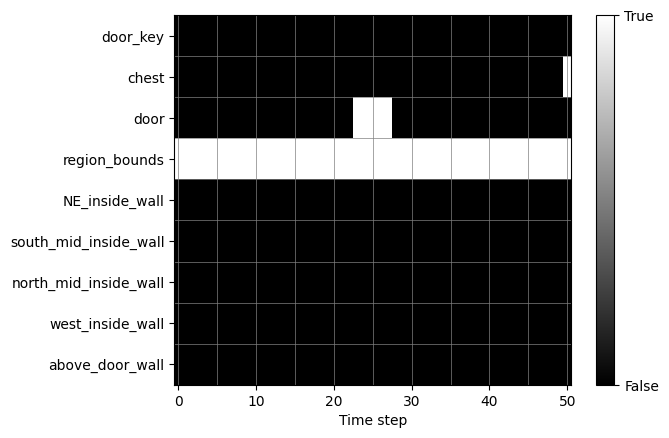

In [8]:
# Show black and white image of the points inside the objects
plt.imshow(inside_array, aspect='auto', cmap='gray')
plt.xlabel('Time step')
plt.yticks(range(N), objects.keys())

cbar = plt.colorbar()
cbar.set_ticks([0., 1.])
cbar.set_ticklabels(['False', 'True'])

#show lines between the objects
for i in range(N-1):
     plt.axhline(i+0.5, color='gray', linewidth=0.5)
# show vertical lines for every 5 time steps
for i in range(0,T,5):
    plt.axvline(i, color='gray', linewidth=0.5)

plt.show()

In [24]:
objects_inside = {}
for i, object in enumerate(objects.keys()):
    objects_inside[object] = inside_array[i,:]
objects_inside

{'door_key': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'chest': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 'door': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'region_bounds': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'NE_inside_wall': array([0., 0., 

In [51]:
def task_accomplished(objects, inside_array, scenario_name):

    objects_inside = {}
    for i, object in enumerate(objects.keys()):
        objects_inside[object] = inside_array[i,:]
    objects_inside

    if scenario_name == "reach_avoid":
        pass
    elif scenario_name == "narrow_maze":
        pass
    elif scenario_name == "treasure_hunt":
        # test if chest is reached
        chest_reached = 1 in objects_inside['chest']
        
        # test if all the walls are avoided
        walls_avoided = True
        for object in objects.keys():
            if 'wall' in object:
                wall_crossed = 1 in objects_inside[object]
                if wall_crossed: walls_avoided = False

        # test if the door is crossed before the key is reached
        key_time = np.where(objects_inside['door_key'] == 1)[0]
        if key_time.size != 0:
            key_crossed = True
            key_time = key_time[0]
        else: 
            key_crossed = False

        door_time = np.where(objects_inside['door'] == 1)[0]
        if door_time.size != 0:
            door_crossed = True
            door_time = door_time[0]
        else:
            door_crossed = False

        door_before_key = door_crossed and key_crossed and door_time < key_time

        return chest_reached and walls_avoided and not door_before_key

In [52]:
task_accomplished(objects, inside_array, scenario_name)

True